In [16]:
from typing import TypedDict, List
from langgraph.graph import StateGraph

In [10]:
class AgentState(TypedDict):
    """
    Represents the state of the agent.
    """
    name: str
    age: str
    final: str

In [11]:
def first_node(state: AgentState) -> AgentState:
    """This is the first node in our sequence."""

    state['final'] = f"Hi {state['name']}!"
    return state

def second_node(state: AgentState) -> AgentState:
    """This is the second node in our sequence."""

    state['final'] = state['final'] + f" You are {state['age']} years old!"
    return state

In [12]:
graph = StateGraph(AgentState)

graph.add_node("first", first_node)
graph.add_node("second", second_node)

graph.set_entry_point("first")
graph.add_edge("first", "second")
graph.set_finish_point("second")

answer = graph.compile()

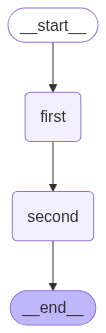

In [13]:
from IPython.display import display, Image

display(Image(answer.get_graph().draw_mermaid_png()))

In [14]:
result = answer.invoke({"name": "Charlie", "age": "30"})
print(result)

{'name': 'Charlie', 'age': '30', 'final': 'Hi Charlie! You are 30 years old!'}


# Exercise

In [17]:
class AgentState2(TypedDict):
    """
    Represents the state of the agent
    """
    name: str
    age: str
    final: str
    skills: List[str]

In [18]:
def node1(state: AgentState2) -> AgentState2:
    """This is the first node in our sequence."""

    state['final'] = f"Hi {state['name']}, welcome to the system!"
    return state

def node2(state: AgentState2) -> AgentState2:
    """This is the second node in our sequence."""

    state['final'] = state['final'] + f" You are {state['age']} years old!"
    return state

def node3(state: AgentState2) -> AgentState2:
    """This is the third node in our sequence."""

    state['final'] = state['final'] + f" Your skills are: {', '.join(state['skills'])}."
    return state

In [19]:
graph2 = StateGraph(AgentState2)

graph2.add_node("node1", node1)
graph2.add_node("node2", node2)
graph2.add_node("node3", node3)

graph2.set_entry_point("node1")
graph2.add_edge("node1", "node2")
graph2.add_edge("node2", "node3")
graph2.set_finish_point("node3")

answer2 = graph2.compile()

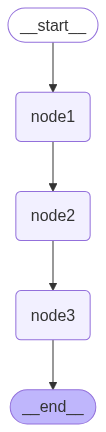

In [20]:
display(Image(answer2.get_graph().draw_mermaid_png()))

In [21]:
result2 = answer2.invoke({
    "name": "Charlie",
    "age": "30",
    "skills": ["Python", "Data Analysis", "Machine Learning"]
})
print(result2)

{'name': 'Charlie', 'age': '30', 'final': 'Hi Charlie, welcome to the system! You are 30 years old! Your skills are: Python, Data Analysis, Machine Learning.', 'skills': ['Python', 'Data Analysis', 'Machine Learning']}
